# Task 1. Logistic map and bifurcation

## Logistic Map

$ x_{n+1} = r * x_{n} * (1-x_{n}) $

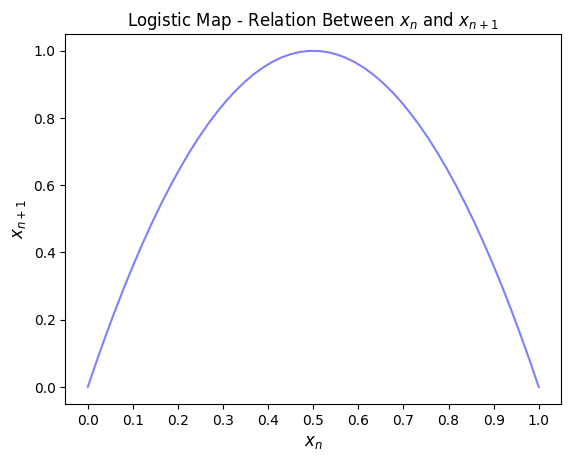

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(r, x):
  return r * x * (1 - x)

fig = plt.figure()
plt.title('Logistic Map - Relation Between $x_{n}$ and $x_{n+1}$', fontsize=12)
plt.xlabel('$x_{n}$', fontsize=12)
plt.ylabel('$x_{n+1}$', fontsize=12)

x = np.linspace(0, 1)
plt.plot(x, logistic(4, x), 'b', alpha=.5)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

#### Below is the graphic with animation of population growth with set $x_{0}$ and $r$ values. By adjusting the values and running the cell again, we can observe population growth for different growth rate and initial population

In [2]:
x_0 = 0.4
r = 4

import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

def time_population(initial_population, r, n_iter, n_skip=0):
  x_t=[]
  t=[]
  k=0
  x = initial_population;

  for i in range(n_iter + n_skip):
      if i >= n_skip:
          x_t.append(x)
          t.append(k)
          k+=1
      x = logistic(r,x)

  return t, x_t

fig, ax = plt.subplots()
fig.set_size_inches(8,6)

def animate(i):
  ax.clear()
  ax.set_title(f"Evolution of Population with Time for $x_{{0}} = {x_0}$ and $r = {r}$", fontsize=12)
  ax.set_xlabel('Time', fontsize=12)
  ax.set_ylabel('$x_{t}$', fontsize=12)
  ax.set_xlim(0, 80)
  ax.set_ylim(0.0, 1.0)
  ax.set_yticks(np.linspace(0.0, 1.0, 11))

  t, x_t = time_population(x_0, r, i)

  l = ax.plot(t, x_t, 'b', alpha=.5)

  return l

anim = animation.FuncAnimation(fig, animate, 80, interval=50, blit=True)

plt.close()

anim

#### Saving last m values of x

In [3]:
n = 1000
x = 0.05
m = 200
r = np.linspace(2.5, 4.0, n, endpoint=True)

n=1000
A=np.zeros((n-m,n))
for j in range(n):
    for i in range(n):
        x = logistic(r[j], x)
        if i >= (n - m):
            A[i-(n-m),j]=x
print(A)

[[0.6        0.6002401  0.6004799  ... 0.24774607 0.77529822 0.34319786]
 [0.6        0.6002401  0.6004799  ... 0.74491216 0.69658198 0.90165236]
 [0.6        0.6002401  0.6004799  ... 0.75950151 0.84510476 0.35470154]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [4]:
x = 200

A=np.zeros((n-m,n))
for j in range(n):
    for i in range(n):
        x = logistic(r[j], x)
        if i >= (n - m):
            A[i-(n-m),j]=x
print(A)

<ipython-input-1-08a70008132c>:14: RuntimeWarning: overflow encountered in double_scalars
  return r * x * (1 - x)


[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


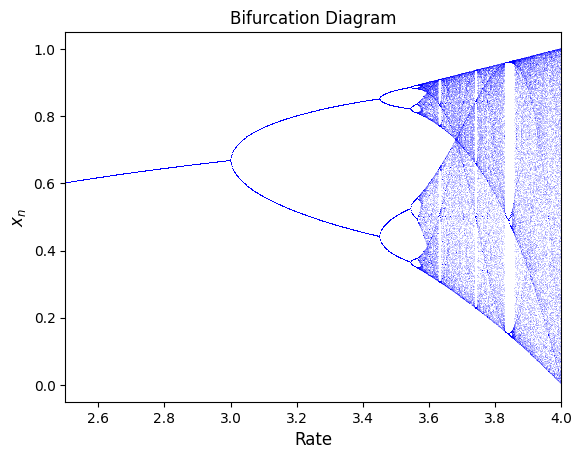

In [5]:
plt.title(f"Bifurcation Diagram", fontsize=12)
plt.xlabel('Rate', fontsize=12)
plt.ylabel('$x_{n}$', fontsize=12)
plt.xlim(2.5, 4)

x = np.full(n, 0.000001)
for i in range(n):
  x = logistic(r, x)
  if i >= (n - m):
      plt.plot(r, x, ',b', alpha=.15)

plt.show()

### Bifurcation Diagram animation

In [7]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

fig, ax = plt.subplots()
fig.set_size_inches(8,6)

n = 100000
r = np.linspace(0.0, 4.0, n)
x = np.random.uniform(0.0, 1.0, n)
iterations = 50

def animate(i, x):
  ax.clear()
  ax.set_title(f"Bifurcation of $x_{{n + 1}} = r * x_{{n}} * (1 - x_{{n}})$ for $n=${i + 1}", fontsize=12)
  ax.set_xlabel('Rate', fontsize=12)
  ax.set_ylabel('$x_{n}$', fontsize=12)
  ax.tick_params(axis='both', which='major', labelsize=9)
  ax.set_xlim(0.0, 4.0)
  ax.set_ylim(0.0, 1.0)

  for _ in range(i + 1):
      x = logistic(r, x)

  l = ax.plot(r, x, ',b', alpha=.15)
  return l

anim = animation.FuncAnimation(fig, animate, iterations, fargs=[x], interval=50, blit=False)

plt.close()

anim